In [1]:
# First we will import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix

C:\Users\Sahil B\AppData\Roaming\Python\Python311\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
# Set a random seed for reproducibility
# Generate synthetic employee dataset
np.random.seed(42)
num_records = 1000

In [3]:
# Generating random data for features
age = np.random.randint(20,60,size = num_records)
gender = np.random.choice(['Male','Female'],size = num_records)
education_level = np.random.choice(['Associates','Bachelor','Master','Phd'],size = num_records)
job_role = np.random.choice(['Designer','Manager','Analyst','Developer'],size = num_records)
department = np.random.choice(['Marketing','HR','Finance','IT'],size = num_records)
years_of_experience = np.random.randint(1,20,size = num_records)
monthly_income = np.random.randint(3000,15000,size = num_records)
number_of_projects = np.random.randint(1,10,size = num_records)

In [4]:
# Now we will generate random data for target variable ie Satisfaction Level
satisfaction_level = np.random.choice([0,1],size = num_records)

In [5]:
# Create a dataframe
data = pd.DataFrame ({
    'Age':age,
    'Gender':gender,
    'Education Level':education_level,
    'Job Role':job_role,
    'Department':department,
    'Years of Experience':years_of_experience,
    'Monthly Income':monthly_income,
    'Number of Projects':number_of_projects,
    'Satisfaction Level':satisfaction_level,
})

In [6]:
# Encode categorial variable (Preprocessing data)
data = pd.get_dummies(data, columns=['Gender', 'Education Level', 'Job Role', 'Department'], drop_first=True)

In [7]:
# Splitting the data into features and target variables
X = data.drop('Satisfaction Level',axis=1)
y = data['Satisfaction Level']

In [8]:
# Splitting the data into Training and Testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
# Training the data Using RandomForestClassifier
clf = RandomForestClassifier (random_state=42)
clf.fit (X_train,y_train)

RandomForestClassifier(random_state=42)

In [10]:
# Make predictions on testset
y_pred = clf.predict(X_test)

In [11]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)

Accuracy: 0.515

Confusion Matrix:
 [[59 39]
 [58 44]]

Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.60      0.55        98
           1       0.53      0.43      0.48       102

    accuracy                           0.52       200
   macro avg       0.52      0.52      0.51       200
weighted avg       0.52      0.52      0.51       200



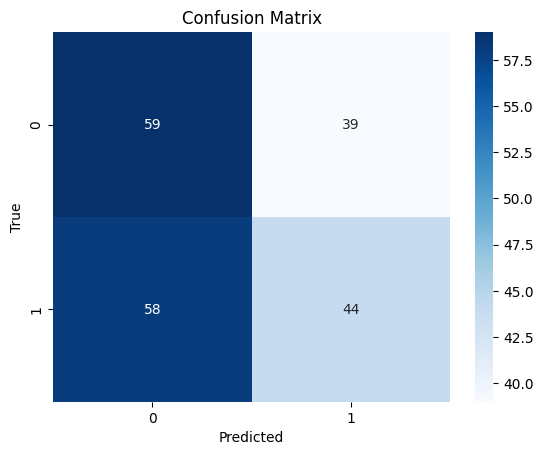

In [12]:
# Finally plotting the confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d',cmap='Blues')
plt.xlabel ('Predicted')
plt.ylabel ('True')
plt.title ('Confusion Matrix')
plt.show()